## Neural Style Transfer

Neural style transfer takes two inputs: a content image (the image whose structure we want to preserve) and a style image (the image from which we extract artistic style). The output is a new image that blends the content of the first with the style of the second.

In [15]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms

DEVICE = 'cuda'

### Content Image

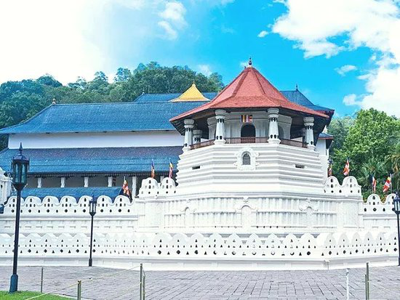

In [12]:
content_image = Image.open("content.jpg")
resize_content_image = content_image.resize((400, 300))
resize_content_image.show()

### style image

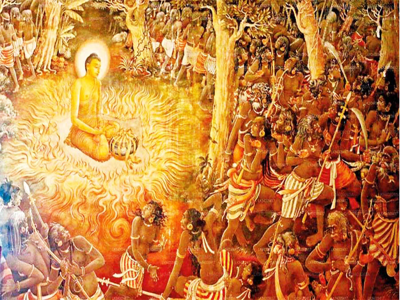

In [14]:
style_image = Image.open("style.jpeg")
resize_style_image = style_image.resize((400, 300))
resize_style_image.show()

We need to process both images before passing onto a Neural Net

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def pre_process(image, image_size=(400, 300)):
    pre_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

    return pre_transform(image).unsqueeze(0)

def post_transform(tensor):
    image = tensor.to('cpu')
    image = image.view(image.shape(2), image.shape(3), image.shape(1))
    image = torch.clamp((image*std + mean), 0, 1)
    image = image.detach().numpy()
    
    return transforms.ToPILImage()(image.permute(2, 0, 1))

In [ ]:
image_size= (400, 300)
image = post_transform(content_image, image_size)

TypeError: post_transform() takes 1 positional argument but 2 were given